In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#got the best degree =5 from prev qn
# def get_beta(mat, tz):
#     return np.linalg.pinv(mat).dot(tz)
def ridge_beta(mat, tz, lam):
    return np.linalg.inv(mat.T.dot(mat) + lam*np.identity(mat.shape[1])).dot(mat.T).dot(tz)

def get_beta(mat, tz):
    return np.linalg.pinv(mat).dot(tz)

def get_z(input, beta):
    return input.dot(beta)

def get_error(z_pred, z):
    ans = np.sum((z_pred - z)**2)
    return ans/len(z)

# Load data from CSV file into Pandas DataFrame
data = pd.read_csv('train_2_1.csv').values
test_data = pd.read_csv('test_2_1.csv').values
ndata = data
vdata = ndata[:int(len(ndata)*0.2)]
tdata = ndata[int(len(ndata)*0.2):]



# Plot the data
tz = tdata[:,2]
vz = vdata[:,2]
test_z = test_data[:,2]
# ax.scatter(data[:,0], data[:,1], data[:,2])

# Set axis labels
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')


train_x = np.array([[i] for i in tdata[:,0]])
train_y = np.array([[i] for i in tdata[:,1]])
train_z = np.array([[i] for i in tz])
valid_x = np.array([[i] for i in vdata[:,0]])
valid_y = np.array([[i] for i in vdata[:,1]])
valid_z = np.array([[i] for i in vz])
test_x = np.array([[i] for i in test_data[:,0]])
test_y = np.array([[i] for i in test_data[:,1]])
test_z = np.array([[i] for i in test_z])
l1 = [1 for i in range(len(train_x))]
l2 = [1 for i in range(len(valid_x))]
l3 = [1 for i in range(len(test_x))]
train_mat = np.array(train_x**0)
valid_mat = np.array(valid_x**0)
test_mat = np.array(test_x**0)



# print(train_mat.shape)


# Show the plot
# plt.show()



In [79]:
test_error = []
valid_error = []
train_error=[]
x=[]
for n in range(1, 6):
    # x.append(n)
    for i in range(n+1):
        # print(i,j)
        j=n-i
        train_mat = np.append(train_mat, np.array(train_x**(i)*train_y**(j)), axis=1)
        valid_mat = np.append(valid_mat, np.array(valid_x**(i)*valid_y**(j)), axis=1)
        test_mat = np.append(test_mat, np.array(test_x**(i)*test_y**(j)), axis=1)

for k in range(650):
    x.append(k/10)
    beta = ridge_beta(train_mat, train_z, k/10)
    z_pred = get_z(valid_mat, beta)
    valid_error.append(get_error(z_pred, valid_z))
    z_pred = get_z(test_mat, beta)
    test_error.append(get_error(z_pred, test_z))
    z_pred = get_z(train_mat, beta)
    train_error.append(get_error(z_pred, train_z))



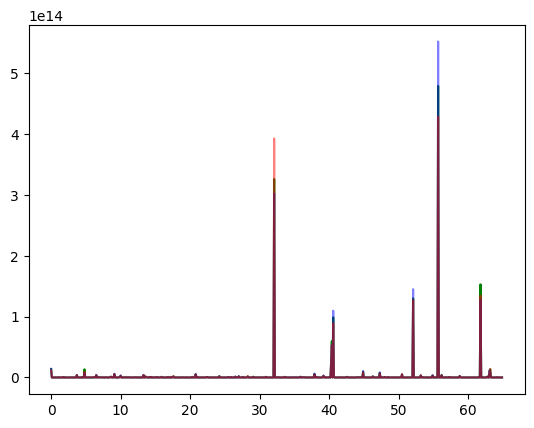

min valid error of  38500585.776848055  at  [63.0]
min test error of  19165963.0601544  at  [63.0]
min train error of  25827274.481744852  at  [63.0]


In [80]:

plt.plot(x, train_error, label='train error', color='green')
plt.plot(x, valid_error, label='validation error', color='blue',alpha=0.5)
plt.plot(x, test_error, label='test error', color='red',alpha=0.5)
plt.show()

min_valid = min(valid_error)
ans1=[]
for i in range(len(valid_error)):
    if valid_error[i] == min_valid:
        ans1.append(x[i])
print("min valid error of ",min_valid, " at ",ans1)

min_test = min(test_error)
ans2=[]
for i in range(len(test_error)):
    if test_error[i] == min_test:
        ans2.append(x[i])
print("min test error of ",min_test," at ",ans2)

min_train = min(train_error)
ans3=[]
for i in range(len(train_error)):
    if train_error[i] == min_train:
        ans3.append(x[i])
print("min train error of ",min_train," at ",ans3)



plotting for degree 5, expected(red) vs predicted(blue) for train data


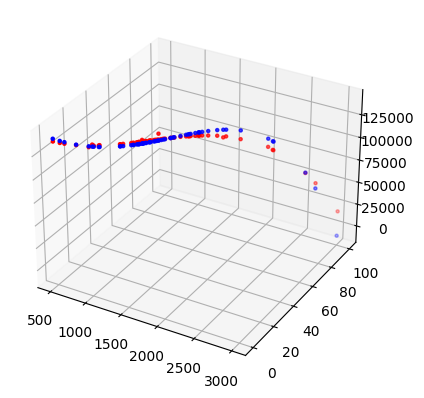

plotting for degree 5, expected(red) vs predicted(blue) for validation data


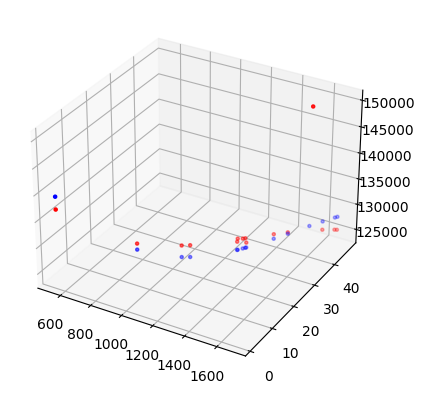

plotting for degree 5, expected(red) vs predicted(blue) for test data


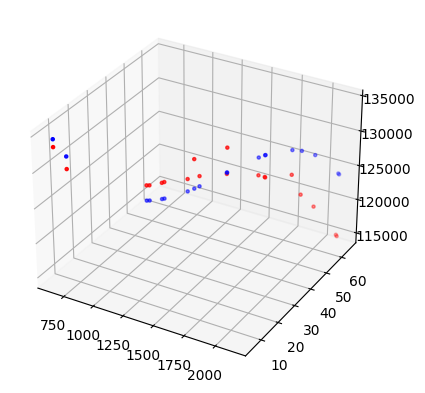

In [81]:
#Considering all the 3 errors, the best lambda is 63.0
#errors from simple regression with degree 5 and no shrinkage
# MSE train error:  754610.9608076443 at degree 5
# MSE valid error:  37447644.153539486 at degree 5
# MSE test error:  1354728.8912767798 at degree 5

best_lambda = 63.0
beta = ridge_beta(train_mat, train_z, best_lambda)
z_pred_train = get_z(train_mat, beta)
# print(z_pred_train.shape)
# print(tdata.shape)
z_pred_test = get_z(test_mat, beta)
z_pred_valid = get_z(valid_mat, beta)

print("plotting for degree 5, expected(red) vs predicted(blue) for train data")
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
ax.scatter(tdata[:,0], tdata[:,1], tdata[:,2],color='red',marker='.', label='Train Data')
ax.scatter(tdata[:,0], tdata[:,1], z_pred_train[:,0],color='blue',marker='.', label='pred Data')
plt.show()

print("plotting for degree 5, expected(red) vs predicted(blue) for validation data")
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
ax.scatter(vdata[:,0], vdata[:,1], vdata[:,2],color='red',marker='.', label='Train Data')
ax.scatter(vdata[:,0], vdata[:,1], z_pred_valid[:,0],color='blue',marker='.', label='pred Data')
plt.show()


print("plotting for degree 5, expected(red) vs predicted(blue) for test data")
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
ax.scatter(test_data[:,0], test_data[:,1], test_data[:,2],color='red',marker='.', label='Train Data')
ax.scatter(test_data[:,0], test_data[:,1], z_pred_test[:,0],color='blue',marker='.', label='pred Data')